<a href="https://colab.research.google.com/github/Er-luffy-D/Brain-Tumor/blob/main/Tumour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import torchvision
import torch
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

In [ ]:
device ="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# Before Running this make sure you got the data on your files Brain_Tumor_Data_Set.zip

from pathlib import Path
import zipfile
import os
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

data_path = Path("data/")

image_path=data_path/"Brain Tumor Data Set"
if image_path.is_dir():
  print(f"{image_path} already exists... skipping downloading ")
else:
  os.makedirs(image_path)
  print(f"{image_path} doesn't exists... extracting.... ")
  with zipfile.ZipFile("/content/Brain_Tumor_Data_Set.zip","r") as zip_ref:
    print(f"Unzipping the zip in {image_path}")
    zip_ref.extractall(image_path)


data/Brain Tumor Data Set doesn't exists... extracting.... 
Unzipping the zip in data/Brain Tumor Data Set


In [ ]:
image_path=Path("data/Brain Tumor Data Set/Brain Tumor Data Set")
train_dir=image_path/"Train"
test_dir=image_path/"Test"

In [ ]:
import os
def walk_through(dir_path):
  """Walks through dir_path returns its contents"""
  for dirpath,dirnames,filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

In [ ]:
walk_through(image_path)

There are 2 directories and 0 images in data/Brain Tumor Data Set/Brain Tumor Data Set
There are 2 directories and 0 images in data/Brain Tumor Data Set/Brain Tumor Data Set/Train
There are 0 directories and 1933 images in data/Brain Tumor Data Set/Brain Tumor Data Set/Train/Tumour
There are 0 directories and 1668 images in data/Brain Tumor Data Set/Brain Tumor Data Set/Train/Healthy
There are 2 directories and 0 images in data/Brain Tumor Data Set/Brain Tumor Data Set/Test
There are 0 directories and 493 images in data/Brain Tumor Data Set/Brain Tumor Data Set/Test/Tumour
There are 0 directories and 418 images in data/Brain Tumor Data Set/Brain Tumor Data Set/Test/Healthy


### Visualizing images

In [ ]:
image_path

PosixPath('data/Brain Tumor Data Set/Brain Tumor Data Set')

data/Brain Tumor Data Set/Brain Tumor Data Set/Train/Tumour/Cancer (690).jpg
Tumour
Image path:data/Brain Tumor Data Set/Brain Tumor Data Set/Train/Tumour/Cancer (690).jpg
Image size  heigth:512 | width:512


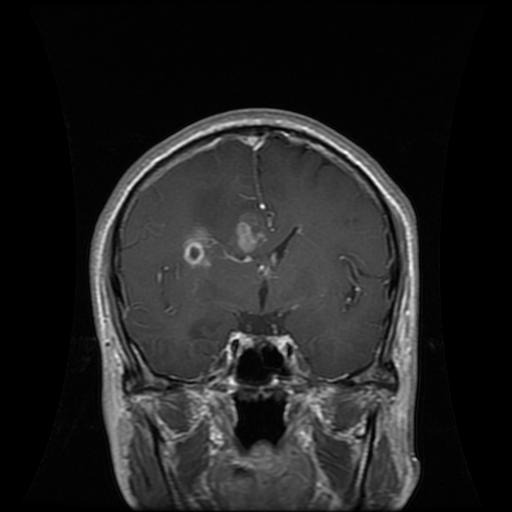

In [ ]:
from PIL import Image
import random

random.seed(42)

image_path_list=list(image_path.glob("*/*/*.jpg"))

random_image_path=random.choice(image_path_list)
print(random_image_path)

image_class = random_image_path.parent.stem
print(image_class)

img=Image.open(random_image_path)

print(f"Image path:{random_image_path}")
print(f"Image size  heigth:{img.height} | width:{img.width}")
img

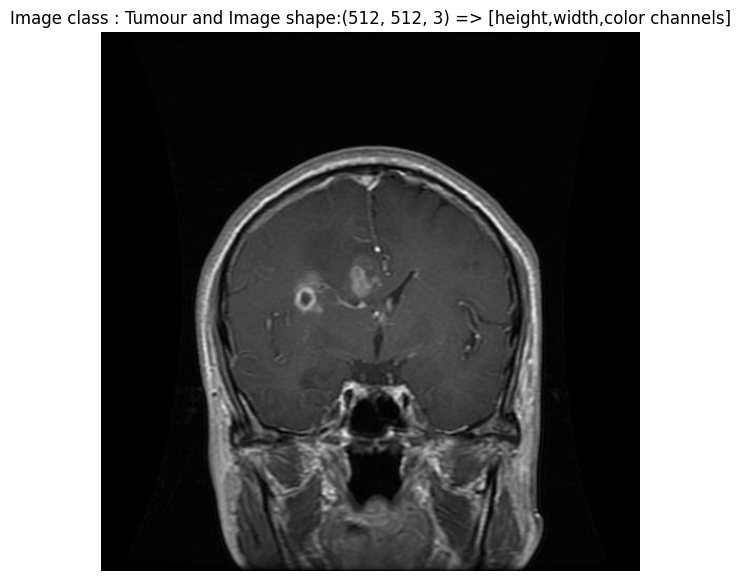

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array=np.asarray(img)

plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class : {image_class} and Image shape:{img_as_array.shape} => [height,width,color channels]")
plt.axis(False);

In [ ]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [ ]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform, # transform for the data
                                  target_transform=None) # transform for the label/target

test_data=datasets.ImageFolder(root=test_dir,
                               transform=data_transform)

train_data,test_data

(Dataset ImageFolder
     Number of datapoints: 3601
     Root location: data/Brain Tumor Data Set/Brain Tumor Data Set/Train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 911
     Root location: data/Brain Tumor Data Set/Brain Tumor Data Set/Test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:
# Get class names as list
class_names=train_data.classes
class_names

['Healthy', 'Tumour']

In [ ]:
# CHeck the lenght of our datasets
len(train_data),len(test_data)

(3601, 911)

In [ ]:
train_data.samples[0]

('data/Brain Tumor Data Set/Brain Tumor Data Set/Train/Healthy/Not Cancer  (1).jpeg',
 0)

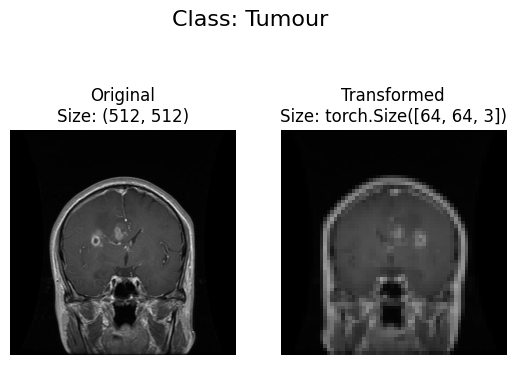

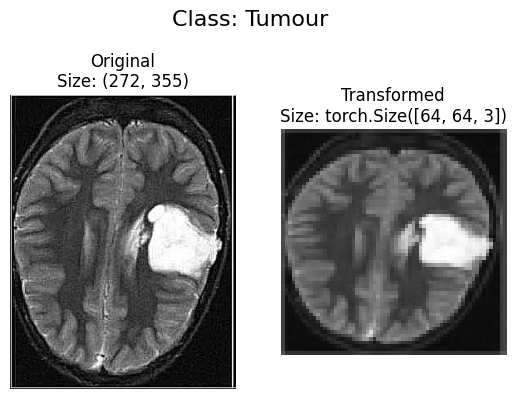

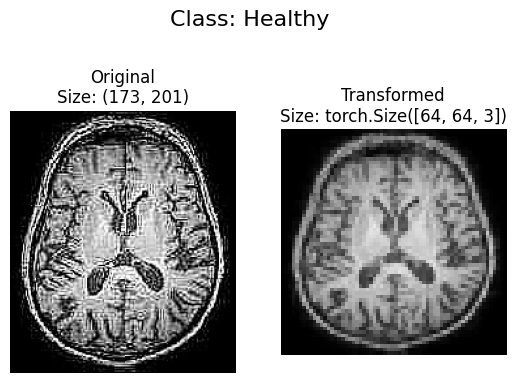

In [ ]:
def plot_transformed_images(image_paths:list,transform,n=3,seed=None):
  """
  Selects random images from a path of images and loads/transforms
  them then plots the original vs the transformed version...
  """
  if seed:
    random.seed(seed)
  random_image_paths=random.sample(image_paths,k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig,ax = plt.subplots(1,2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis("off")

      # Transform and plot target image
      transformed_image=transform(f).permute(1,2,0)   # we have to convert (3,64,64) to (64,64,3) cause matplot takes color channel last
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nSize: {transformed_image.shape}")
      ax[1].axis("off")


      plt.suptitle(f"Class: {image_path.parent.stem}",fontsize=16)
plot_transformed_images(image_path_list,data_transform,n=3,seed=42)

In [ ]:
img,label=train_data[0][0],train_data[0][1]
print(f"Img:  {img}")
print(f"Img shape:  {img.shape}")
print(f"Img datatype:  {img.dtype}")
print(f"Img label:  {label}")
print(f"label datatype:  {type(label)}")

Img:  tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
Img shape:  torch.Size([3, 64, 64])
Img datatype:  torch.float32
Img label:  0
label datatype:  <class 'int'>


Original shape: torch.Size([3, 64, 64])->[color_channels,height,width]
Original shape: torch.Size([64, 64, 3])->[height,width,color_channels]


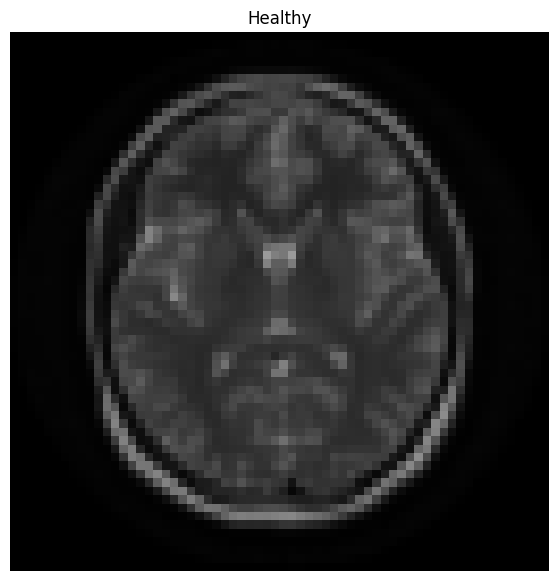

In [ ]:
# Rearrange the order dimensions
img_permute = img.permute(1,2,0)

# Print out different shapes
print(f"Original shape: {img.shape}->[color_channels,height,width]")
print(f"Original shape: {img_permute.shape}->[height,width,color_channels]")

# Plot the image
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label]);

### Turning loaded image into Dataloader

In [ ]:
from torch.utils.data import DataLoader
import os

NUM_WORKER=os.cpu_count()
BATCH_SIZE=32
train_dataloader=DataLoader(dataset=train_data,
                            batch_size=BATCH_SIZE,
                            num_workers=NUM_WORKER,
                            shuffle=True)
test_dataloader=DataLoader(dataset=test_data,
                            batch_size=BATCH_SIZE,
                            num_workers=NUM_WORKER,
                            shuffle=False)
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7861c1c31e70>,
 <torch.utils.data.dataloader.DataLoader at 0x7861c1c31a50>)

In [ ]:
len(train_dataloader),len(test_dataloader)

(113, 29)

In [ ]:
img, label = next(iter(train_dataloader))

#Batch size will now be 1, you can change the batch size if you like
print(f"Image shape: {img.shape} -> [batch_size, color_channels,height,width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels,height,width]
Label shape: torch.Size([32])
